# Supervised Classification with comparison between different algorithms

In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Dataset Input
data = pd.read_csv('heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.shape

(299, 13)

In [4]:
X = data.iloc[::-1]
y = data.iloc[:,-1]

In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [6]:
#Separating train and test data
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [7]:
#Feature Scaling by Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Import sklearn supervised classification modules
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics



In [9]:
metrices = pd.DataFrame(columns=['model' ,'score',])

In [10]:
models=[
        RandomForestClassifier(n_estimators = 50, criterion = 'entropy',random_state=0),
        XGBClassifier(),
        LogisticRegression(random_state=0),
        SVC(random_state=0),
        DecisionTreeClassifier(random_state = 0),
        KNeighborsClassifier(),
       
       ]

accuracy: 0.833


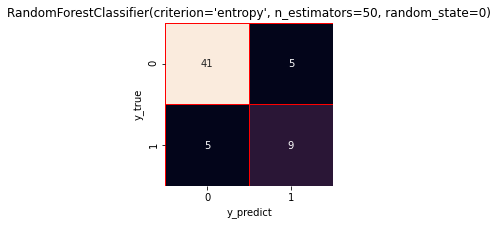

[03:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.800


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


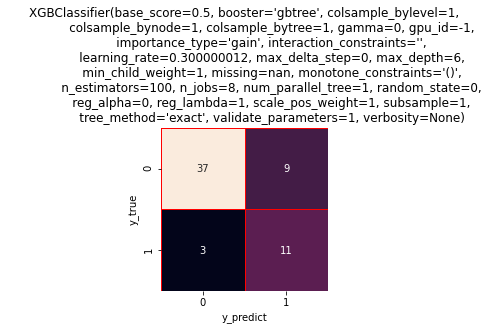

accuracy: 0.783


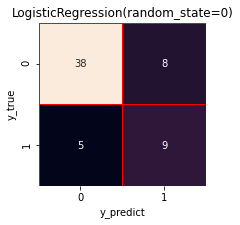

accuracy: 0.783


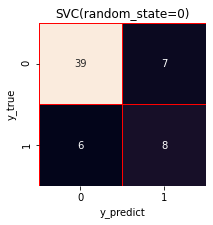

accuracy: 0.783


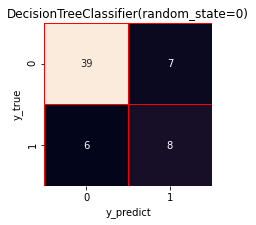

accuracy: 0.717


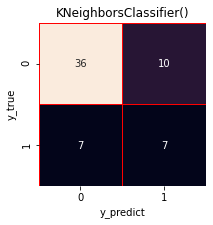

In [11]:
for model in models:
    classifier = model
    classifier.fit(X_train,y_train)
    classifier.predict(X_test)
    y_pred = classifier.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score = metrics.accuracy_score(y_test,y_pred)
    print('accuracy: %0.3f' % score)
    
    
    f,ax = plt.subplots(figsize=(3,3))
    sns.heatmap(cm,annot=True,linewidths=0.5,cbar=False,linecolor="red",fmt='.0f',ax=ax)
    plt.xlabel("y_predict")
    plt.ylabel("y_true")
    ax.set(title=str(classifier))
    plt.show()
    metrices = metrices.append({'model': classifier,'score': score},ignore_index = True)

    
    

In [12]:
metrices = metrices.sort_values('score',ascending=False)

In [13]:
metrices

,model,score,test accuracy
0,"(DecisionTreeClassifier(criterion='entropy', m...",0.833333,NaN
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.800000,NaN
2,LogisticRegression(random_state=0),0.783333,NaN
3,SVC(random_state=0),0.783333,NaN
4,DecisionTreeClassifier(random_state=0),0.783333,NaN
5,KNeighborsClassifier(),0.716667,NaN
